<a href="https://colab.research.google.com/github/MRobalinho/Multispectral_Images/blob/master/Multispectral_images_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multispectral images

Documentation:
>http://www.spectralpython.net/

>http://www.spectralpython.net/fileio.html

>https://www.geeksforgeeks.org/working-images-python/

>https://www.geeksforgeeks.org/reading-images-in-python

>https://hub.packtpub.com/image-classification-and-feature-extraction-images/

>https://pypi.org/project/tifffile/

>https://www.fileformat.info/format/tiff/sample/index.htm

MRobalinho: 6 - 1 -2019

## Some basic principles of the electromagnetic spectrum.

The electromagnetic spectrum is composed of a range of different wavelengths or “colors” of light energy. A spectral remote sensing instrument collects light energy within specific regions of the electromagnetic spectrum. Each region in the spectrum is referred to as a band.

## Space vs Airborne Data
Remote sensing data can be collected from the ground, the air (using airplanes or helicopters) or from space. You can imagine that data that are collected from space are often of a lower spatial resolution than data collected from an airplane. The tradeoff however is that data collected from a satellite often offers better (up to global) coverage.

For example the Landsat 8 satellite has a 16 day repeat cycle for the entire globe. This means that we can find a new image for an area, every 16 days. It takes a lot of time and financial resources to collect airborne data. Thus data are often only available for smaller geographic areas.

## Bands and Wavelengths
When talking about spectral data, we talk from both, the electromagnetic spectrum and image bands. Spectral remote sensing data are collected by powerful camera-like instruments known as imaging spectrometers. Imaging spectrometers collect reflected light energy in “bands.”

A band represents a segment of the electromagnetic spectrum.  For example, the wavelength values between 800 nanometers (nm) and 850 nm might be one band captured by an imaging spectrometer. The imaging spectrometer collects reflected light energy within a pixel area on the ground. Since an imaging spectrometer collects many different types of light - for each pixel the amount of light energy for each type of light or band will be recorded. So, for example, a camera records the amount of red, green and blue light for each pixel.

Often when we work with a multispectral dataset, the band information is reported as the center wavelength value. This value represents the center point value of the wavelengths represented in that band. Thus in a band spanning 800-850 nm, the center would be 825 nm.

## Spectral Resolution
The spectral resolution of a dataset that has more than one band, refers to the spectral width of each band in the dataset.
While a general spectral resolution of the sensor is often provided, not all sensors collect information within bands of uniform widths.

## Spatial Resolution
The spatial resolution of a raster represents the area on the ground that each pixel covers. If you have smaller pixels in a raster the data will appear more “detailed.” If you have large pixels in a raster, the data will appear more coarse or “fuzzy.”

## What is Multispectral Imagery?
One type of multispectral imagery that is familiar to many of us is a color image. A color image consists of three bands: red, green, and blue. Each band represents light reflected from the red, green or blue portions of the electromagnetic spectrum. The pixel brightness for each band, when composited creates the colors that you see in an image. These colors are the ones your eyes can see within the visible portion of the electromagnetic spectrum. 
In a Multispectral image we can plot each band of a multi-band image individually using a grayscale color gradient.


https://www.earthdatascience.org/courses/earth-analytics-python/multispectral-remote-sensing-in-python/intro-multispectral-data/

https://youtu.be/3iaFzafWJQE

https://youtu.be/jaARDWeyNDE




# Work Images

In [0]:
# Path to the image files
path  = 'multispec_database/ir_car/'
path2 = 'multispec_database/ir_building/'
file = path + "car001.jpg"

In [0]:
# Verify my current folder
import os
currDir = os.path.dirname(os.path.realpath("__file__"))
print(currDir)                   

C:\Users\Lenovo\ML\Multispectral_Images


## Using MatplotLib :
Matplotlib is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack. It was introduced by John Hunter in the year 2002. Matplotlib comes with a wide variety of plots. Plots helps to understand trends, patterns, and to make correlations. 

In [0]:
# Using Matplotlib to plot the Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print some stats
image = mpimg.imread(file)
print('This image is: ',type(image), 
     'with dimensions:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (480, 640)


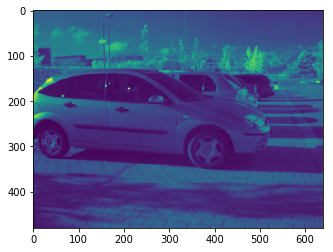

In [0]:
# Plotting the image
imgplot=plt.imshow(image)
plt.show()

## Using OpenCV : 
OpenCV (Open Source Computer Vision) is a computer vision library that contains various functions to perform operations on pictures or videos. It was originally developed by Intel but was later maintained by Willow Garage and is now maintained by Itseez. This library is cross-platform that is it is available on multiple programming languages such as Python, C++ etc.

In [0]:
# importing OpenCV(cv2) module 
import cv2 
  
# Save image in set directory 
# Read RGB image 
img = cv2.imread(file2)  
  
# Output img with window name as 'image' 
cv2.imshow('image', img)  
  
# Maintain output window utill 
# user presses a key 
cv2.waitKey(0)         
  
# Destroying present windows on screen 
cv2.destroyAllWindows()  

## Using PIL :
PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities. It was developed by Fredrik Lundh and several other contributors. Pillow is the friendly PIL fork and an easy to use library developed by Alex Clark and other contributors.

In [0]:
# Read Image
from PIL import Image
jpgfile = Image.open(file)

print('Bits file:', jpgfile.bits, '    Size File:',jpgfile.size, '    Format file:',jpgfile.format)

Bits file: 8     Size File: (640, 480)     Format file: JPEG


## Open Image an an array

In [0]:
aFile  = Image.open(file)

# Transform Image to array
aArray = np.array(aFile)
#a[:,:,0] *=0
#a[:,:,1] *=0

# Transform array to Image
cImage = Image.fromarray(aArray)
cImage.show()

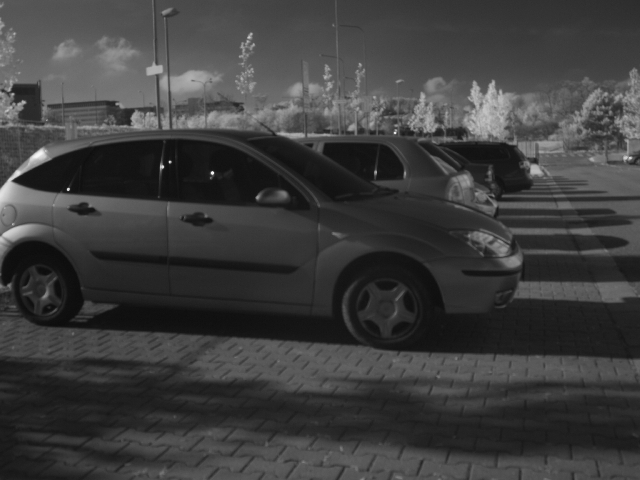

In [0]:
cImage

In [0]:
# Display image array
aArray

array([[ 91,  94,  88, ...,  45,  43,  45],
       [102,  98,  91, ...,  45,  46,  43],
       [113, 109,  98, ...,  45,  45,  44],
       ..., 
       [ 28,  25,  26, ...,  70,  72,  72],
       [ 29,  28,  27, ...,  65,  68,  71],
       [ 28,  27,  28, ...,  63,  66,  67]], dtype=uint8)

In [0]:
# Look from an chanel from then image

def channel(img, n):
    """Isolate the nth channel from the image.

       n = 0: red, 1: green, 2: blue
    """
    a = np.array(img)
    a[:,:,(n!=0, n!=1, n!=2)] *= 0
#    a[:,:,n] *= 0
    return Image.fromarray(a)

In [0]:
xx = channel(file, 1)

IndexError: too many indices for array

## Rotate Image

In [0]:
from PIL import Image 

In [0]:
# Rotate image in Angle X
# Image x
# Angle given n

def rotateImage(x, n):  
    
    return x.rotate(n)

In [0]:
aFile  = Image.open(file)

image2 = rotateImage(aFile, 90)

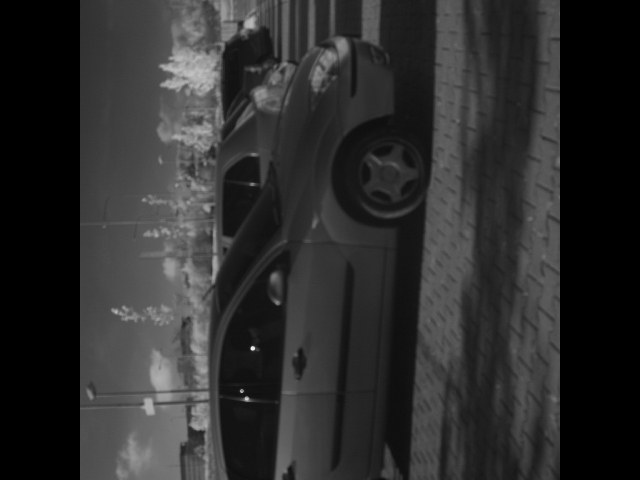

In [0]:
image2

In [0]:
#Saved in the same relative location 
image2.save("rotate_picture.jpg") 

## Resizing an Image

In [0]:
from PIL import Image

In [0]:
# def to resize 
# Given parameters : image , number to divide (resize)
def imageResize(img, n):
    width, height = img.size 

    print('Original size:', width, '/', height, 'Resize:',n)
    
    newWidth = int(width / n)
    newHeight = int(height / n)
    img.resize((newWidth, newHeight), Image.ANTIALIAS)
    print('New size:', newWidth, '/', newHeight)
    return img

In [0]:
aFile  = Image.open(file)
xFile = imageResize(aFile, 5)
   
          
#Saved in the same relative location 
xFile.save("resized_picture.jpg") 


Original size: 640 / 480 Resize: 5
New size: 128 / 96


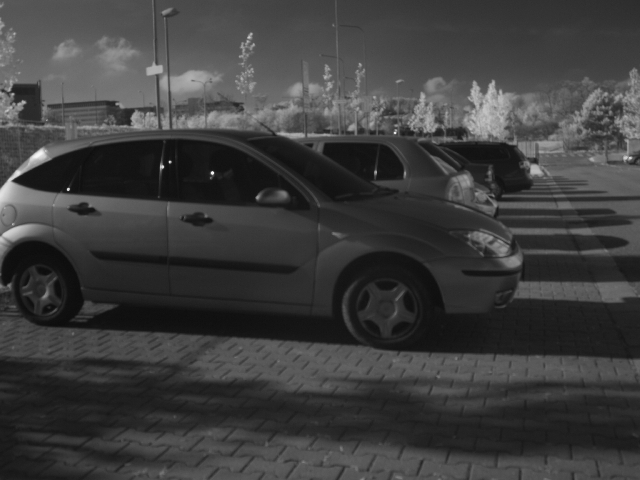

In [0]:
aFile

## Pasting an image on another image

In [0]:
# Relative Path 
# Image 1
file1 = path + "car001.jpg"
aFile = Image.open(file1)
# Image 2
file2 = path2 + "building001.jpg"
bFile = Image.open(file2)
 

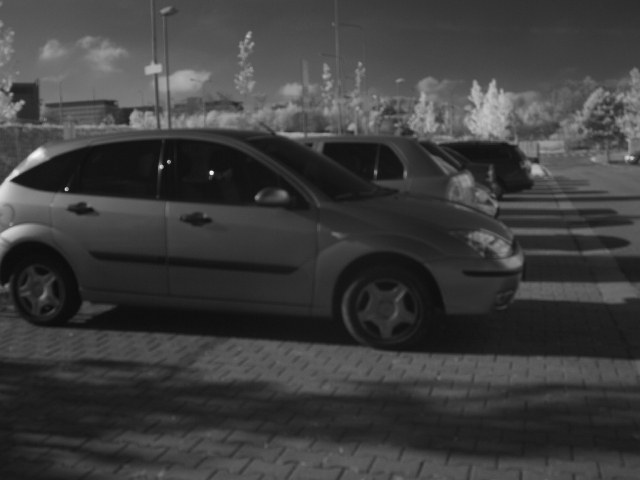

In [0]:
aFile

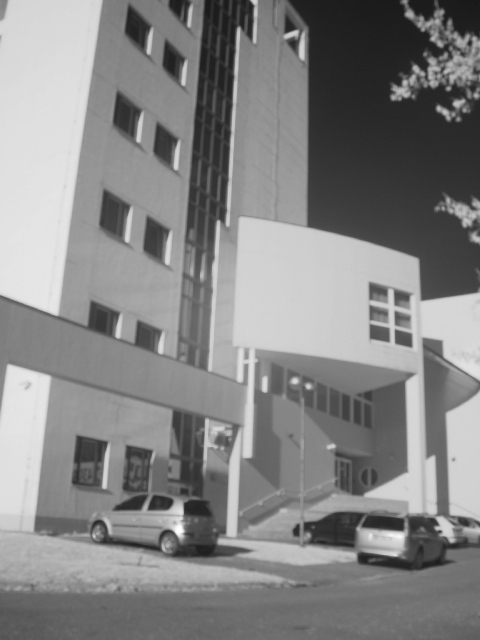

In [0]:
bFile

In [0]:
def pastImage(img1, img2, x, y):
  
    return img1.paste(img2, (x, y))

In [0]:
pastImage(aFile, bFile, 1, 200)

#Saved in the same relative location 
aFile.save("pasted_picture.jpg")


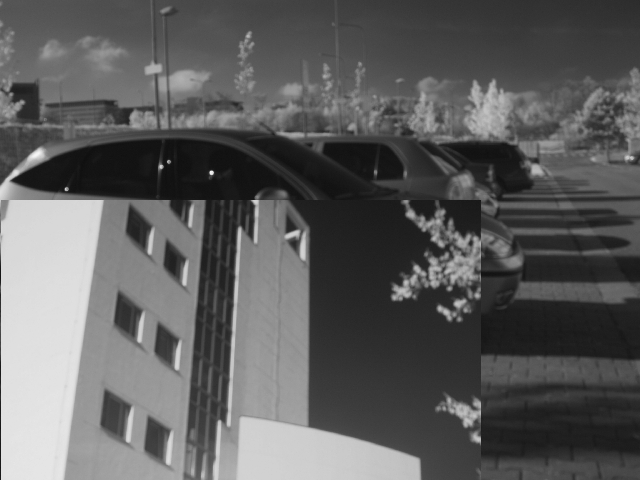

In [0]:
aFile

##  The histogram of image

In [0]:
#Getting histogram of image 
print(aFile.histogram())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 113, 553, 1064, 1686, 2018, 2414, 4280, 5351, 4912, 4255, 3392, 2910, 2710, 2290, 2426, 3201, 4109, 3851, 4583, 4876, 4302, 4316, 4711, 4231, 4598, 5217, 4780, 4044, 4073, 4316, 3547, 3491, 3810, 3512, 3137, 2759, 3068, 2972, 3207, 3536, 3336, 2699, 2602, 3091, 2897, 2866, 3260, 3324, 3098, 3089, 3313, 3162, 2985, 3073, 2930, 2803, 3044, 3299, 2754, 2897, 3106, 3241, 2958, 2955, 3089, 2905, 3176, 3131, 3120, 3333, 3320, 3365, 3451, 3522, 3157, 3124, 3161, 2872, 2350, 2271, 2057, 1699, 1613, 1536, 1410, 1424, 1334, 1286, 1299, 1207, 1081, 983, 1135, 1059, 1038, 1037, 1000, 1054, 1088, 1005, 1049, 1116, 895, 865, 800, 790, 721, 668, 667, 638, 501, 455, 479, 467, 420, 421, 376, 388, 399, 324, 335, 372, 340, 325, 293, 292, 276, 266, 266, 263, 216, 207, 221, 203, 199, 173, 195, 190, 192, 184, 155, 163, 179, 151, 163, 130, 143, 136, 114, 117, 115, 127, 103, 90, 79, 84, 78, 90, 82, 81, 78, 94, 72, 53, 72, 49, 48, 48, 44, 38, 35, 37, 33, 28, 19, 17, 19, 

## Transposing an Image
This feature gives us the mirror image of an image

In [0]:
#transposing image  
transposed_img = aFile.transpose(Image.FLIP_LEFT_RIGHT) 
          
#Save transposed image 
transposed_img.save("transposed.jpg") 

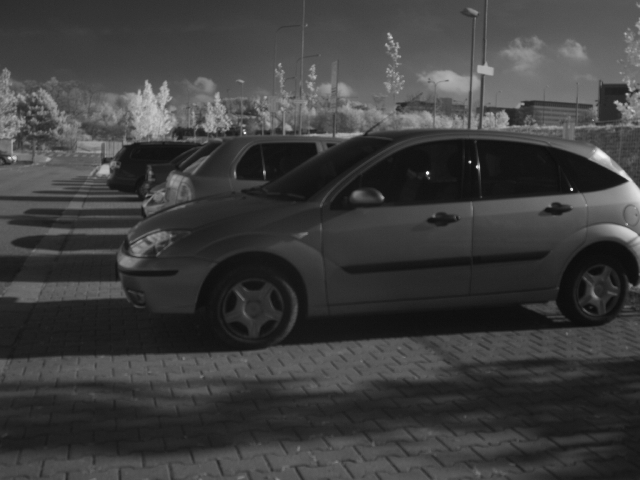

In [0]:
transposed_img

## Split an image into individual bands
Splitting an image in RGB mode, creates three new images each containing a copy of the original individual bands.

In [0]:
# Image 1
file1 = path + "car001.jpg"
aFile = Image.open(file1)

#splitting the image 
print(aFile.split()) 

(<PIL.Image.Image image mode=L size=640x480 at 0x1F0A43A7E80>,)


## Creating a thumbnail
creates a thumbnail of the image that is opened. It does not return a new image object, it makes in-place modification to the currently opened image object itself. If you do not want to change the original image object, create a copy and then apply this method. This method also evaluates the appropriate to maintain the aspect ratio of the image according to the size passed.


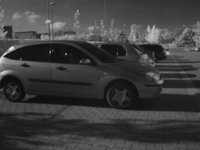

In [0]:
# Image 1
file1 = path + "car001.jpg"
aFile = Image.open(file1)

#In-place modification 
aFile.thumbnail((200, 200))  
          
aFile.save("thumb.jpg")
aFile

# tobitmap
Converting an image to an X11 bitmap (A plain text binary image format). It returns a string containing an X11 bitmap, it can only be used for mode “1” images, i.e. 1 bit pixel black and white images.

In [0]:
# Image 1
file1 = path + "car001.jpg"
aFile = Image.open(file1)

img = aFile
print(aFile.mode) 
          
#converting image to bitmap 
print(aFile.tobitmap()) 
          
print(type(img.tobitmap()) )

L


ValueError: not a bitmap

## Read TIF Images


In [0]:
# Doc
# http://code.nabla.net/doc/PIL/api/PIL/TiffImagePlugin/PIL.TiffImagePlugin.TiffImageFile.html
path3 = 'TIF_Image/'
file3 = path3 + "example3.tiff"

In [0]:
# Read TIFF Image
from PIL import Image
tiff = Image.open(file3)

print('Size File:',tiff.size, '    Format file:',tiff.format)

Size File: (768, 768)     Format file: TIFF


In [0]:
# Show Tiff image
tiff.show('Test')
tiff

In [0]:
# Rotate
f1 = tiff.rotate(90)

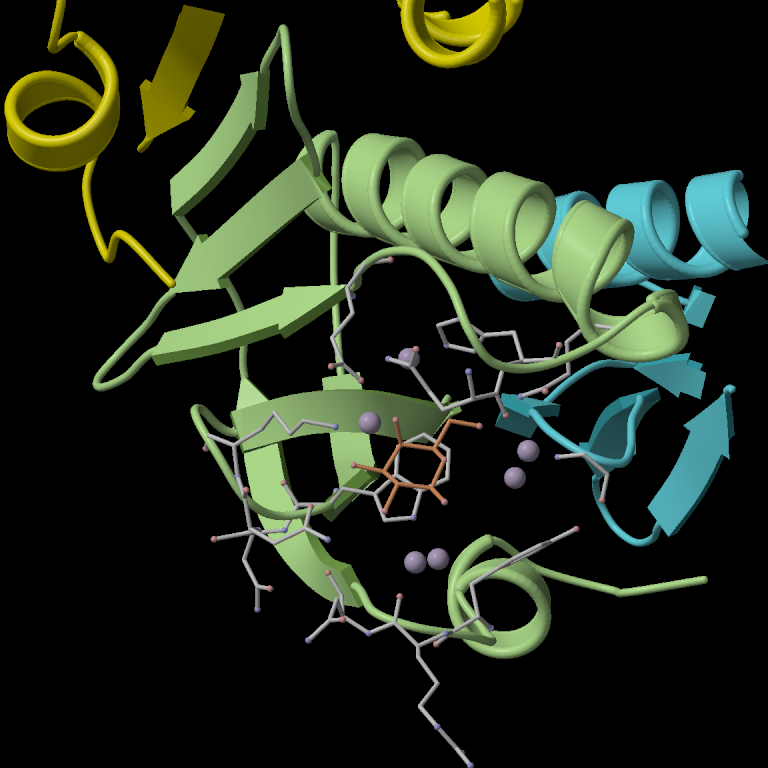

In [0]:
f1.show()
f1

In [0]:
print('Mode File:', f1.mode) 

Mode File: RGB


In [0]:
xFile = imageResize(f1, 50)

Original size: 768 / 768 Resize: 50
New size: 15 / 15


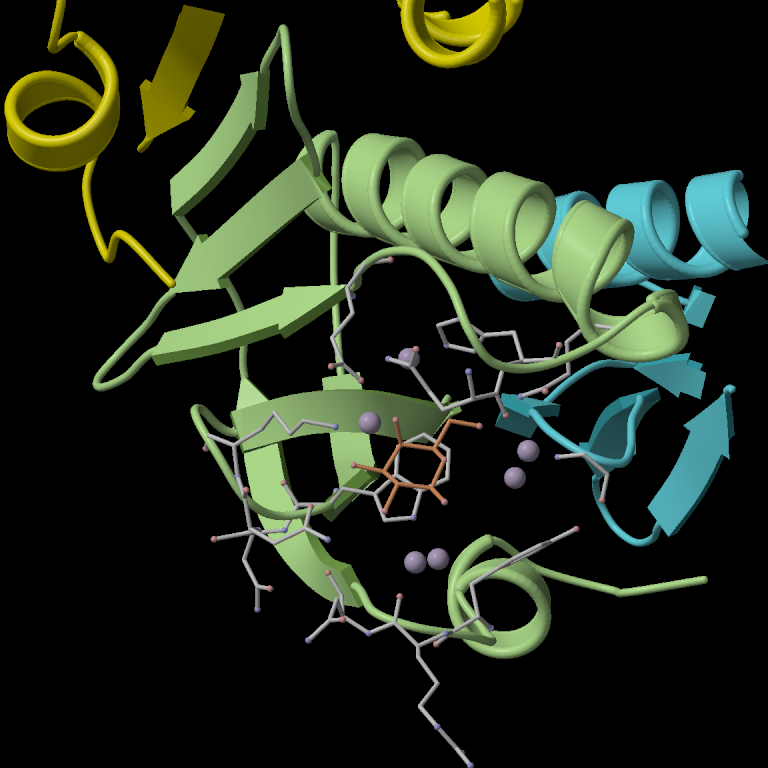

In [0]:
xFile

In [0]:
# Print Bands from image
tiff.getbands()

('R', 'G', 'B')

In [0]:
# Display extrems from each band
tiff.getextrema()

((0, 234), (0, 233), (0, 231))

In [0]:
f_r = list(tiff.getdata())
f_r

[(0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0,

In [0]:
print(tiff.getcolors())

None


In [0]:
# Histogram from the picture
print(tiff.histogram())

[428982, 0, 0, 0, 0, 0, 11, 2, 13, 20, 26, 24, 37, 36, 33, 40, 96, 92, 337, 172, 321, 204, 223, 110, 119, 125, 123, 172, 182, 212, 233, 325, 398, 484, 772, 771, 616, 700, 584, 746, 559, 488, 529, 327, 383, 369, 379, 836, 1340, 330, 396, 537, 357, 407, 916, 539, 838, 506, 505, 759, 655, 656, 728, 721, 827, 774, 884, 925, 984, 1230, 1693, 1134, 1251, 2029, 1978, 1549, 1336, 1298, 1447, 1482, 1541, 1729, 1164, 1198, 1283, 1904, 1329, 1113, 1237, 1410, 1435, 1365, 1184, 1305, 1393, 1236, 601, 616, 588, 583, 588, 562, 591, 624, 595, 605, 533, 524, 559, 615, 657, 740, 655, 697, 680, 684, 705, 640, 660, 723, 715, 725, 715, 756, 791, 1115, 1117, 996, 916, 970, 1045, 1025, 1001, 1065, 1093, 1128, 1281, 1262, 1018, 1107, 1162, 1255, 1145, 1192, 1260, 1271, 1345, 1395, 1381, 1332, 1344, 1339, 1464, 1579, 1577, 1660, 1297, 1546, 2221, 1245, 1223, 1272, 1523, 1610, 1648, 1758, 2104, 2302, 3361, 3255, 846, 536, 410, 362, 397, 386, 344, 361, 474, 460, 443, 346, 364, 348, 309, 228, 249, 256, 235, 278,

In [0]:
print(tiff.getpalette())

None


In [0]:
f3 = tiff.thumbnail((200, 200)) 
f3

In [0]:
print(tiff.mode) 
          
#converting image to bitmap 
print(tiff.tobitmap()) 
          
print(type(tiff.tobitmap()) )

RGB


ValueError: not a bitmap

In [0]:
# Split image into bands
tiff.split()

(<PIL.Image.Image image mode=L size=200x200 at 0x212A8511AC8>,
 <PIL.Image.Image image mode=L size=200x200 at 0x212A8511B00>,
 <PIL.Image.Image image mode=L size=200x200 at 0x212A8511C88>)

In [0]:
fx1 = tiff.seek(0)
fx1

In [0]:
# pip install tifffile
import tifffile as tiff

C:\ProgramData\Anaconda3\lib\site-packages\imagecodecs\__init__.py:19: UserWarning: 

numpy.core.multiarray failed to import

*******************************************************************

The _imagecodecs Cython extension module could not be loaded.
Using a fallback module with limited functionality and performance.

*******************************************************************
        
  """ % str(error))
